In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import itertools

In [68]:
data = pd.read_csv('creditcard.csv.crdownload')
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [69]:
data.isnull().values.any()

True

In [70]:
data.dropna(inplace=True)

In [71]:
data.isnull().values.any()

False

In [72]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [76]:
data['Amount'].describe()

count    11664.000000
mean        62.795132
std        179.816783
min          0.000000
25%          5.000000
50%         15.950000
75%         50.000000
max       7712.430000
Name: Amount, dtype: float64

In [77]:
# Calculating the number of genuine transactions, number of fraud transactions and the percentage of fraud transactions.

In [78]:
non_fraud = len(data[data.Class==0])
fraud = len(data[data.Class==1])
fraud_percent = (fraud / (fraud+non_fraud))*100 

print('Number of Genuine Transaction: ', non_fraud)
print('Number of Fraud Transaction: ', fraud)
print('Percentage of Fraud Transaction: {:.4f}'.format(fraud_percent))

Number of Genuine Transaction:  11615
Number of Fraud Transaction:  49
Percentage of Fraud Transaction: 0.4201


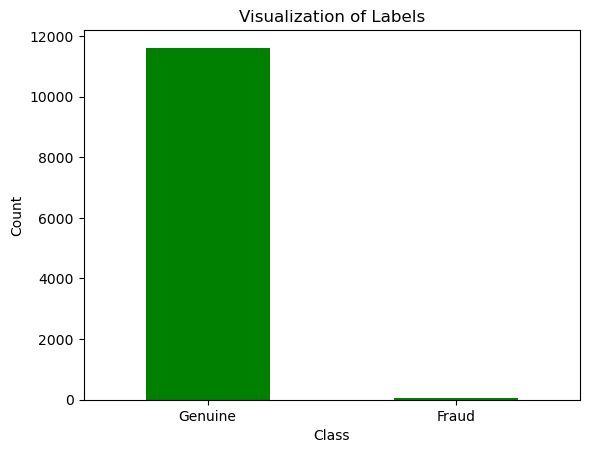

In [79]:
# visualizing the genuine and fraud transactions using bar graph


labels = ["Genuine", "Fraud"]
count_classes = data.value_counts(data['Class'], sort= True)
count_classes.plot(kind = "bar", rot = 0, color='green')
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

In [80]:
# Normalizing the amount column and storing the new values in the Normalized Amount column.

In [81]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

data['Normalized Amount'] = sc.fit_transform(data['Amount'].values.reshape(-1,1))

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Normalized Amount
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0,0.482873
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0,-0.334272
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0,1.756668
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0,0.337607
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0,0.040014


In [82]:
# Performing Train-Test Split

In [83]:
data.drop(['Amount','Time'], inplace=True, axis=1)
Y = data["Class"]
X = data.drop(["Class"], axis= 1)

from sklearn.model_selection import train_test_split

(train_X, test_X, train_Y, test_Y) = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of train_X: ",train_X.shape)
print("Shape of test_X: ",test_X.shape)

Shape of train_X:  (8164, 29)
Shape of test_X:  (3500, 29)


In [84]:
# Decision tree and random forest model for training on top of the train set.

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
#Decision Tree
dt = DecisionTreeClassifier()
# Random Forest
rf = RandomForestClassifier(n_estimators= 100)

In [86]:
# Decision Tree
dt.fit(train_X, train_Y)
predictions_dt = dt.predict(test_X)
dt_score = dt.score(test_X, test_Y) * 100

print("Decision Tree Score: ", dt_score)

Decision Tree Score:  99.91428571428571


In [89]:
# Random Forest

rf.fit(train_X, train_Y)
predictions_rf = rf.predict(test_X)
rf_score = rf.score(test_X, test_Y) * 100

print("Random Forest Score: ", rf_score)

Random Forest Score:  99.88571428571429


In [90]:
predictions_dt[:20]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [91]:
predictions_rf[:20]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [92]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score
def metrics(actuals, predictions):
    print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.5f}".format(f1_score(actuals, predictions)))

In [93]:
# confusion Metrix for Decision tree:

confusion_matrix_dt = confusion_matrix(test_Y, predictions_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt)

Confusion Matrix - Decision Tree
[[3483    1]
 [   2   14]]


In [94]:
metrics(test_Y, predictions_dt)

Accuracy: 0.99914
Precision: 0.93333
Recall: 0.87500
F1-score: 0.90323


In [95]:
# confusion Metrix for Random Forest:

confusion_matrix_rf = confusion_matrix(test_Y, predictions_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

Confusion Matrix - Random Forest
[[3482    2]
 [   2   14]]


In [96]:
metrics(test_Y, predictions_rf)

Accuracy: 0.99886
Precision: 0.87500
Recall: 0.87500
F1-score: 0.87500


In [ ]:
# Therefore Decision Tree gives a better model and prediction for fraud detection in the credut card.